In [1]:
import os
import django
from django.db import connection
import sys
import datetime
sys.path.append('../')
import pandas as pd
import matplotlib.pyplot as plt
os.environ.setdefault('DJANGO_SETTINGS_MODULE', 'activity_viewer.settings')
django.setup()

In [2]:
from dashboard.models import Log

/home/ubuntu/anaconda3/envs/s3_usage/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


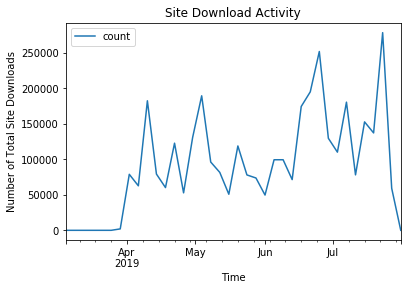

CPU times: user 247 ms, sys: 13.7 ms, total: 260 ms
Wall time: 1min 22s


In [3]:
%%time
readings = []
logs = Log.objects.filter(http_status=200)
time = datetime.datetime(2019, 3, 1, tzinfo=datetime.timezone.utc)
interval_delta = datetime.timedelta(4)
# Iterate in chunks across database and sum up request count for evenly sized intervals
while time < datetime.datetime.now(tz=datetime.timezone.utc):
    # Notice we filter data to left and right of the time
    count = logs.filter(time__range=(time - interval_delta / 2, time + interval_delta / 2)).count()
    time += interval_delta
    readings.append((time, count))
readings_df = pd.DataFrame(readings, columns=['time', 'count'])
readings_df.set_index('time', inplace=True)
axes = readings_df.plot(kind='line')
axes.set(xlabel='Time', ylabel='Number of Total Site Downloads', title='Site Download Activity')
plt.show()